Oi Alan,

Aqui é a Lara. Fico feliz em revisar o seu projeto hoje.

Quando eu identificar um erro pela primeira vez, eu irei apenas apontá-lo. Vou deixar que você identifique e conserte o erro, pois estou buscando te preparar para trabalhar como um Cientista de Dados. Em um cenário real, a sua liderança faria o mesmo. Caso você não consiga encontrar o erro, vou dar dicas mais precisas na próxima revisão.

Meus comentários serão neste formato abaixo, **por favor, não mova, edite ou apague os comentários**.

Eles serão em caixas verdes, amarelas ou vermelhas, conforme abaixo:

<div class="alert alert-block alert-success">
<b>Comentário da Revisora</b> <a class="tocSkip"></a>
    
Sucesso! Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário da Revisora</b> <a class="tocSkip"></a>
    
Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário da Revisora</b> <a class="tocSkip"></a>
Precisa de correção. É necessário fazer algumas correções para que o projeto seja aceito.
</div>

Você pode me responder usando este bloco:

<div class="alert alert-block alert-info">
<b>Resposta do estudante.</b> <a class="tocSkip"></a>
</div>

# TESTANDO HIPÓTESES

<b>
De uma lista de hipóteses, priorizar as que podem aumentar a receita, lançando um Teste A/B e analisando os resultados.
<b>

Descrição dos dados

 - Dados usados na primeira parte do projeto
   - /datasets/hypotheses_us.csv Baixe o conjunto de dados
     - Hypotheses — breves descrições das hipóteses
     - Reach — alcance do usuário, em uma escala de um a dez
     - Impact — impacto nos usuários, em uma escala de um a dez
     - Confidence — confiança na hipótese, em uma escala de um a dez
     - Effort — os recursos necessários para testar uma hipótese, em uma escala de um a dez. Quanto maior o valor de Effort, mais recursos são necessários para o teste.

 - Dados usados na segunda parte do projeto
   - /datasets/orders_us.csv Baixe o conjunto de dados
     - transactionId — identificador do pedido
     - visitorId — identificador do usuário que fez o pedido
     - date — do pedido
     - revenue — do pedido
     - group — o grupo de teste A/B ao qual o usuário pertence
   - /datasets/visits_us.csv Baixe o conjunto de dados
     - date — data
     - group — grupo de teste A/B
     - visits — o número de visitas na data especificada para o grupo de teste A/B especificado
Certifique-se de pré-processar os dados. Pode haver erros nos conjuntos de dados originais; por exemplo, alguns dos visitantes podem ter entrado no grupo A e no grupo B.

Parte 1. Priorizando Hipóteses

- O arquivo hypotheses_us.csv contém nove hipóteses para aumentar a receita de uma loja online com Reach, Impact, Confidence e Effort especificados para cada um. A tarefa é:
   - Aplicar o framework ICE para priorizar hipóteses. Classifique-os em ordem decrescente de prioridade.
   - Aplicar o framework RICE para priorizar hipóteses. Classifique-os em ordem decrescente de prioridade.
   - Mostre como a priorização de hipóteses muda quando você usa RICE em vez de ICE. Dê uma explicação para as alterações.

Parte 2. Análise de teste A/B

- Você realizou um teste A/B e obteve os resultados descritos nos arquivos orders_us.csv e visitors_us.csv. A tarefa é:
  - Analise o teste A/B:
     - Faça um gráfico da receita acumulada por grupo. Tire conclusões e crie conjecturas.
     - Faça um gráfico do tamanho médio acumulado do pedido por grupo. Tire conclusões e crie conjecturas.
     - Faça um gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A.        - Faça conclusões e crie conjecturas.
     - Calcule a taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia. Trace as taxas de conversão diárias dos dois grupos e descreva a diferença. Tire conclusões e crie conjecturas.
     - Faça um gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A. Tire conclusões e crie conjecturas.
     - Calcule os percentis 95 e 99 para o número de pedidos por usuário. Defina o ponto em que um ponto de dados se torna uma anomalia.
     - Faça um gráfico de dispersão dos preços dos pedidos. Tire conclusões e crie conjecturas.
     - Calcule os percentis 95 e 99 dos preços dos pedidos. Defina o ponto em que um ponto de dados se torna uma anomalia.
     - Encontre a significância estatística da diferença na conversão entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.
     - Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.
     - Encontre a significância estatística da diferença na conversão entre os grupos usando os dados filtrados.Tire conclusões e crie conjecturas.
     - Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados. Tire conclusões e crie conjecturas.
     - Tome uma decisão com base nos resultados do teste. As decisões possíveis são: 1. Pare o teste, considere um dos grupos o líder. 2. Pare o teste, conclua que não há diferença entre os grupos. 3. Continue o teste.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso, você adicionou introdução.
</div>

## Início

### Carregando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from scipy import stats as st
import seaborn as sns
import math as mth

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso, a importação das bibliotecas está centralizada em uma seção.
</div>

### Carregando as bases de dados

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', skipinitialspace=True, sep=';')
orders = pd.read_csv('/datasets/orders_us.csv', skipinitialspace=True)
visits = pd.read_csv('/datasets/visits_us.csv', skipinitialspace=True)

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso na leitura dos dados.
</div>

## Explorando os dados

### Informações gerais/resumidas

In [3]:
#Amostra do conjunto de dados
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
pd.options.display.max_colwidth = 130
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [5]:
#Amostra do conjunto de dados
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [6]:
#Amostra do conjunto de dados
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
#Informações gerais
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [8]:
#Informações gerais
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [9]:
#Informações gerais
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
#Descrição Geral
hypotheses.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [11]:
#Descrição Geral
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [12]:
#Descrição Geral
visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [13]:
#Verficando valores ausentes
hypotheses.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

In [14]:
#Verficando valores ausentes
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [15]:
#Verficando valores ausentes
visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [16]:
#Valores duplicados
hypotheses.duplicated().sum()

0

In [17]:
#Valores duplicados
orders.duplicated().sum()

0

In [18]:
#Valores duplicados
visits.duplicated().sum()

0

Pelas verificações acima, percebe-se a consistência dos dados. Não há valores nulos, valores ausentes ou duplicados. Aplicando o método describe(), nota-se a presença de valores outliers no conjunto de dados 'orders' que serão tratados posteriormente.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso e foi adicionada conclusão parcial à seção.
</div>

## Priorizando hipóteses

Como foi disponibilizado um conjunto de dados contendo 9 hipóteses, serão aplicados os métodos ICE e RICE de priorização de hipóteses. 

### Aplicando o método ICE

In [19]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [20]:
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses.sort_values('ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


In [21]:
hypotheses.sort_values('RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


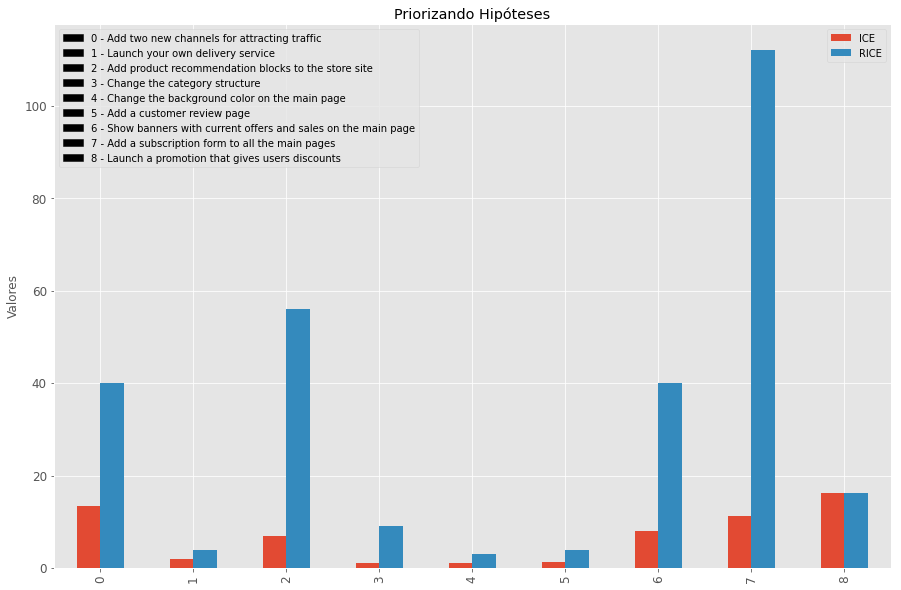

In [22]:
col1 = 'steelblue'
col2 = 'darkred'
plt.style.use("ggplot")

aa = hypotheses[['Hypothesis','ICE', 'RICE']].plot(kind='bar', title ="Priorizando Hipóteses", figsize=(15, 10), legend=True, fontsize=12)
aa.set_ylabel("Valores", fontsize=12)
aa.legend()


legend_dict = { '0 - Add two new channels for attracting traffic' : '0', '1 - Launch your own delivery service' : '0','2 - Add product recommendation blocks to the store site':'0','3 - Change the category structure':'0',
                 '4 - Change the background color on the main page':'0','5 - Add a customer review page':'0','6 - Show banners with current offers and sales on the main page':'0',
                  '7 - Add a subscription form to all the main pages':'0','8 - Launch a promotion that gives users discounts':'0'}
aa2 = aa.twinx()
patchList = []
for key in legend_dict:
        data_key = patches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

aa2.legend(handles=patchList, loc=2)
plt.savefig('legend.png', bbox_inches='tight')
aa2.get_yaxis().set_visible(False)
plt.grid()
plt.show()

Pelas tabelas dos frameworks e do grafico gerados acima, ICE e RICE se diferem especialmente na influência da medição REACH (Alcance), ou seja, quando os valores para essa medida são baixos, ICE e RICE são praticamente indiferentes. Proém quando  mediçã REACH atinge um determinado valor, acaba influenciando no resultado.
O framework ICE é utilizado quando não há a necessidade de diferenciar entre alcance e impacto. Já o framework RICE quando quiser diferenciar entre um recurso que pode ter um grande impacto para um público pequeno e um pequeno impacto para um grande público.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Excelente, e foram adicionadas discussões.
</div>

## Análise do Teste A/B

### Cálculo da receita acumulada

In [23]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [24]:
orders['visitorId'].duplicated().sum()

166

In [25]:
#Verificando  duplicidade nos dados
duplicated_orders = orders[orders['visitorId'].duplicated()]

In [26]:
duplicated_orders

,transactionId,visitorId,date,revenue,group
41,2594268419,237748145,2019-08-15,20.8,A
91,3176574859,2742574263,2019-08-22,275.9,B
95,372616894,457167155,2019-08-22,20.2,B
98,1962247337,2706377257,2019-08-01,110.7,A
112,1638982251,3062433592,2019-08-01,135.3,B
...,...,...,...,...,...
1182,2682156369,1668030113,2019-08-14,20.8,B
1183,1458356232,963407295,2019-08-14,80.0,A
1184,1329499668,2949041841,2019-08-14,160.7,B
1189,4082620617,393266494,2019-08-14,490.4,B


Foram encontrados 166 registros duplicados, ou seja, usuários que participaram do teste no grupo A e B ao mesmo tempo.

In [27]:
#Remoendo duplicados
orders.drop_duplicates(subset=['visitorId'], inplace=True)
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


As 166 linhas duplicadas foram removidas do dataframe 'orders'.

In [28]:
#Criando uma nova coluna com o mês
ordersA = orders.query('group == "A"').groupby('date')['revenue'].sum().reset_index()

In [29]:
ordersA.head()

,date,revenue
0,2019-08-01,1950.0
1,2019-08-02,1198.1
2,2019-08-03,1815.2
3,2019-08-04,675.5
4,2019-08-05,1642.6


In [30]:
#Criando uma nova coluna com o mês
ordersB = orders.query('group == "B"').groupby('date')['revenue'].sum().reset_index()

In [31]:
ordersB.head()

,date,revenue
0,2019-08-01,1484.7
1,2019-08-02,2522.8
2,2019-08-03,1806.8
3,2019-08-04,1466.7
4,2019-08-05,1454.8


<div class="alert alert-block alert-danger">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Alan, está tudo excelente. Só não consegui identificar se foi feito um tratamento para tirar os dados que estão presentes nos dois grupos.
Poderia verificar?
</div>

<div class="alert alert-block alert-info">
<b>Oi Lara. Obrigado pelas observações. Realmente foi falha minha. Fiz um ".duplicates().sum" e vi que deu 0 como resposta mas não pesquisei mais a fundo, conforme orientação na descrição do projeto. Obrigado pela observação.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (revisão 2)</b> <a class="tocSkip"></a>
    
Show, Alan! Imagine.
</div>

In [32]:
#Agrupando e contando os valores de receita
orders_revenue = orders.groupby(['date','group'])['revenue'].count().reset_index()

In [33]:
orders_revenue

,date,group,revenue
0,2019-08-01,A,19
1,2019-08-01,B,20
2,2019-08-02,A,17
3,2019-08-02,B,22
4,2019-08-03,A,24
...,...,...,...
57,2019-08-29,B,16
58,2019-08-30,A,9
59,2019-08-30,B,21
60,2019-08-31,A,8


In [34]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [35]:
#Calculando a soma, média e mediana das compras diárias dos grupos A e B
orders.pivot_table(index='date', columns='group', values='revenue', aggfunc=['sum','mean','median']).head()

sum                mean             median       
group            A       B           A           B      A      B
date                                                            
2019-08-01  1950.0  1484.7  102.631579   74.235000   50.1  50.40
2019-08-02  1198.1  2522.8   70.476471  114.672727   45.6  45.25
2019-08-03  1815.2  1806.8   75.633333  112.925000   58.2  48.00
2019-08-04   675.5  1466.7   61.409091  104.764286   35.6  62.75
2019-08-05  1642.6  1454.8   78.219048   66.127273   35.6  30.40

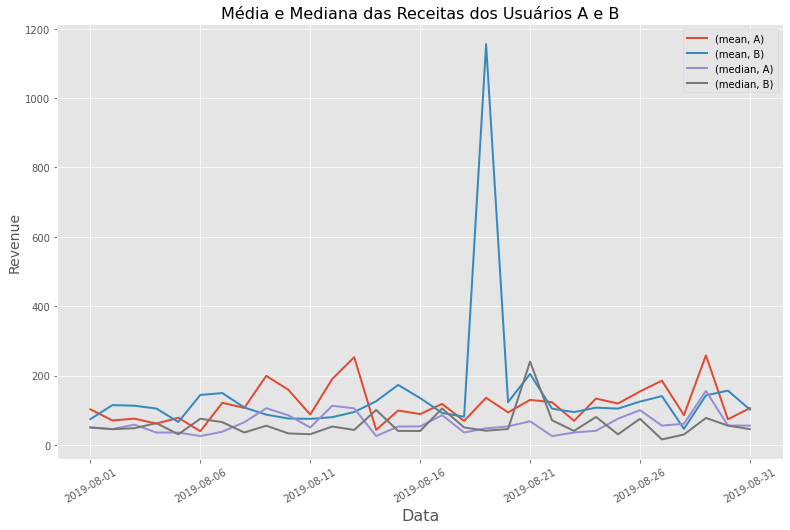

In [36]:
col1 = 'teal'
plt.style.use("ggplot")

ax = orders.pivot_table(index='date', columns='group', values='revenue', aggfunc=['mean','median']).plot(linewidth=2, label='Usuários A', figsize=(13,8))
ax.set_xlabel('Data', fontsize=16)
ax.set_ylabel('Revenue',fontsize=14)
ax.set_title("Média e Mediana das Receitas dos Usuários A e B",size=16)
ax.xaxis.set_tick_params(rotation = 30)
plt.legend()
plt.show()

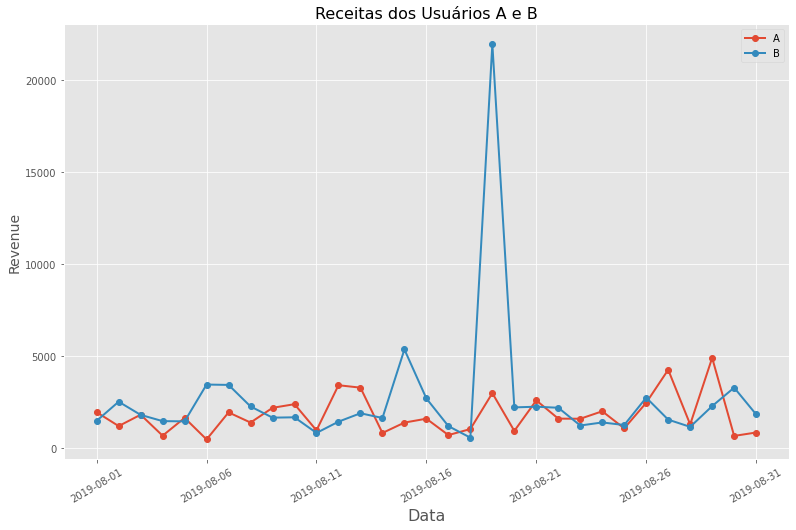

In [37]:
col1 = 'teal'
plt.style.use("ggplot")
ax = orders.pivot_table(index='date', columns='group', values='revenue', aggfunc='sum').plot(linewidth=2, label='Usuários A',marker='o', figsize=(13,8))
ax.set_xlabel('Data', fontsize=16)
ax.set_ylabel('Revenue',fontsize=14)
ax.set_title("Receitas dos Usuários A e B",size=16)
ax.xaxis.set_tick_params(rotation = 30)
plt.legend()
plt.show()

In [38]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [39]:
#Agrupando por grupo e data e somando a receita
orders_rev_sum = orders.pivot_table(index='date', columns='group', values='revenue', aggfunc='sum').reset_index()
orders_rev_sum.head()

group,date,A,B
0,2019-08-01,1950.0,1484.7
1,2019-08-02,1198.1,2522.8
2,2019-08-03,1815.2,1806.8
3,2019-08-04,675.5,1466.7
4,2019-08-05,1642.6,1454.8


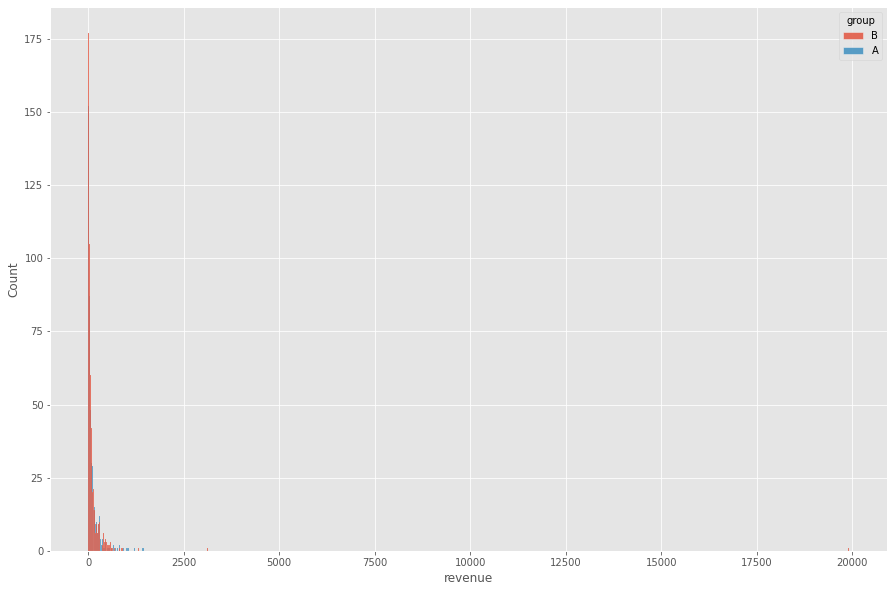

In [40]:
plt.figure(figsize=(15,10))
sns.histplot(data=orders, x="revenue", hue="group", alpha=0.8)
plt.show()

Pelos gráficos plotados acima dos conjunto de dados 'orders', onde verifica-se o comportamento dos grupos A e B ao analisar as receitas. Percebe-se a distorção dos outliers ao plotar um gráfico com a media e mediana de ambos os grupos, ou seja, o grupo B mais usuários realizaram compras com valores altos se comparadoao grupo A.Isso fica evidenciado quando plotado o histograma dos dados, onde verifica-se a grande variabilidade dos valores dos dados

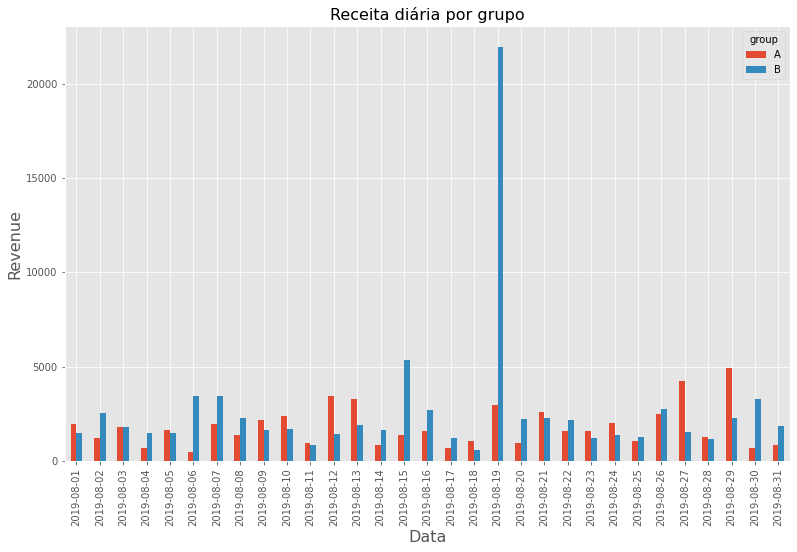

In [41]:
col1 = 'steelblue'
col2 = 'darkred'
ax = orders.pivot_table(index='date', columns='group', values='revenue', aggfunc='sum').plot.bar(figsize=(13,8))
ax.set_xlabel('Data', fontsize=16)
ax.set_ylabel('Revenue', fontsize=16)
ax.set_title('Receita diária por grupo', size=16)
plt.show()

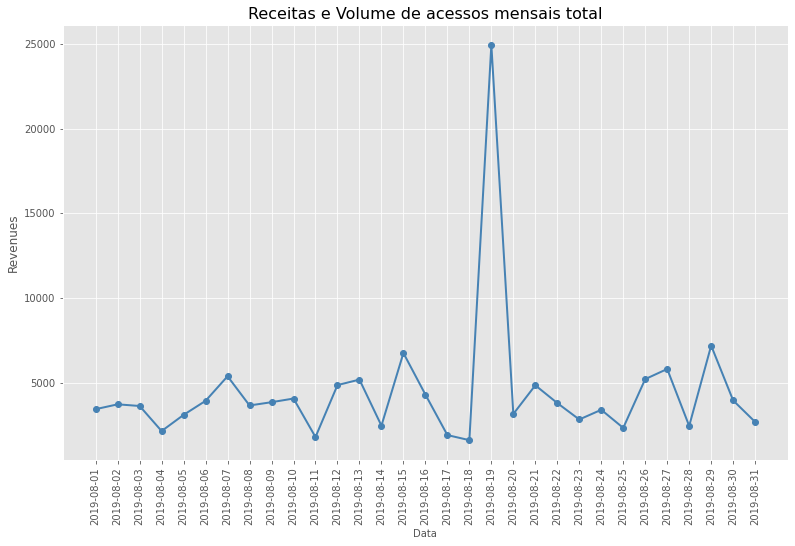

In [42]:
col1 = 'steelblue'
col2 = 'darkred'

fig,ax = plt.subplots(figsize=[13,8])

ax.plot(orders.groupby('date').agg({'revenue':'sum'}),color=col1, marker='o',linewidth=2)
ax.set_xlabel('Data', fontsize=10)
ax.set_ylabel('Revenues')
ax.xaxis.set_tick_params(rotation = 90)
ax.set_title("Receitas e Volume de acessos mensais total",size=16)
plt.style.use("ggplot")
plt.show()

Acima foi plotado um gráfico de barras da receita diária dos dois grupos, onde fica evidente os valores outliers. Nota-se também uma pequena vantagem do grupo B em relação ao grupo A em termos de receita. Foi plotado também um gráfico com a receita total dos dois grupos no período, onde também verifica-se a sazonalidade e variabilidade das receitas ao longo do período.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Excelente a seção, só há o ponto que comentei, após verificar os usuários que estão em ambos grupos, pode ser que seus resultados mudem!
</div>

<div class="alert alert-block alert-info">
<b>Oi Lara. Ajstado o comentário. Obrigado pelas observações.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (revisão 2)</b> <a class="tocSkip"></a>
    
Boa! Imagina.
</div>

### Cálculo dos pedidos acumulados

In [43]:
#Agrupando por grupo e data e contando as transações
orders.pivot_table(index='date', columns='group', values='transactionId', aggfunc='count').head()

group,A,B
date,,
2019-08-01,19,20
2019-08-02,17,22
2019-08-03,24,16
2019-08-04,11,14
2019-08-05,21,22


In [44]:
#Agrupando por grupo e data e contando as transações com a média
orders.pivot_table(index='date', columns='group', values='transactionId', aggfunc='count').mean()

group
A    15.322581
B    17.935484
dtype: float64

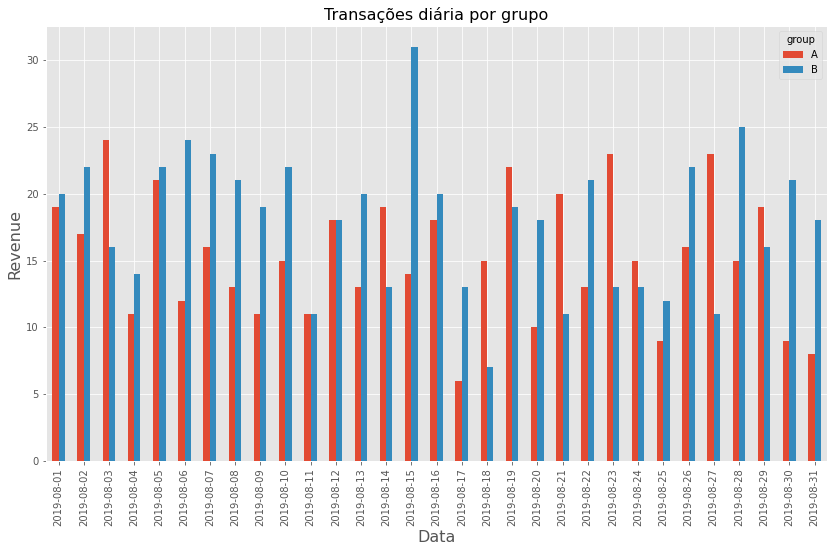

In [45]:
col1 = 'steelblue'
col2 = 'darkred'
ax = orders.pivot_table(index='date', columns='group', values='transactionId', aggfunc='count').plot.bar(figsize=(14,8))
ax.set_xlabel('Data', fontsize=16)
ax.set_ylabel('Revenue', fontsize=16)
ax.set_title('Transações diária por grupo', size=16)
plt.show()

In [46]:
#Ordenando a tabela
visits.sort_values(by='date', ascending=True)

,date,group,visits
0,2019-08-01,A,719
31,2019-08-01,B,713
1,2019-08-02,A,619
32,2019-08-02,B,581
2,2019-08-03,A,507
...,...,...,...
28,2019-08-29,A,577
60,2019-08-30,B,490
29,2019-08-30,A,490
30,2019-08-31,A,699


In [47]:
# Juntando as tabelas 'orders' e 'visits'
orders_visits = pd.merge(orders_revenue,visits,on=['date','group'], how='left')

In [48]:
#Relação entre receita e acessos
orders_visits['ratio'] = orders_visits['revenue'] / orders_visits['visits']

In [49]:
orders_visits.head()

,date,group,revenue,visits,ratio
0,2019-08-01,A,19,719,0.026426
1,2019-08-01,B,20,713,0.028050
2,2019-08-02,A,17,619,0.027464
3,2019-08-02,B,22,581,0.037866
4,2019-08-03,A,24,507,0.047337


In [50]:
#Média e media da relação entre receita e acessos
orders_visits.groupby('group').agg({'ratio':['median','mean']}).head()

ratio          
         median      mean
group                    
A      0.024845  0.026416
B      0.031434  0.030853

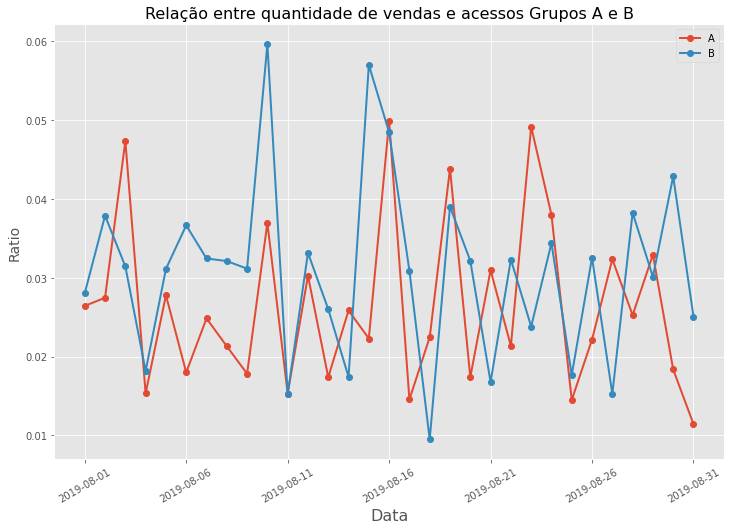

In [51]:
col1 = 'teal'
plt.style.use("ggplot")
ax = orders_visits.pivot('date','group','ratio').plot(linewidth=2, label='Usuários A',marker='o', figsize=(12,8))
ax.set_xlabel('Data', fontsize=16)
ax.set_ylabel('Ratio',fontsize=14)
ax.set_title("Relação entre quantidade de vendas e acessos Grupos A e B",size=16)
ax.xaxis.set_tick_params(rotation = 30)
plt.legend()
plt.show()

In [52]:
#Soma dos acessos e receita por grupo
orders_visits_group = orders_visits.groupby('group')[['visits','revenue']].sum().reset_index()

In [53]:
orders_visits_group

,group,visits,revenue
0,A,18736,475
1,B,18916,556


In [54]:
orders_visits_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   group    2 non-null      object
 1   visits   2 non-null      int64 
 2   revenue  2 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 176.0+ bytes


In [55]:
#Relação entre receita e acessos
(orders_visits_group["revenue"] / orders_visits_group["visits"]).round(4)

0    0.0254
1    0.0294
dtype: float64

A relação entre quantidade de compras e acessos é maior no grupo B do que no grupo A.

In [56]:
orders_visits_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   group    2 non-null      object
 1   visits   2 non-null      int64 
 2   revenue  2 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 176.0+ bytes


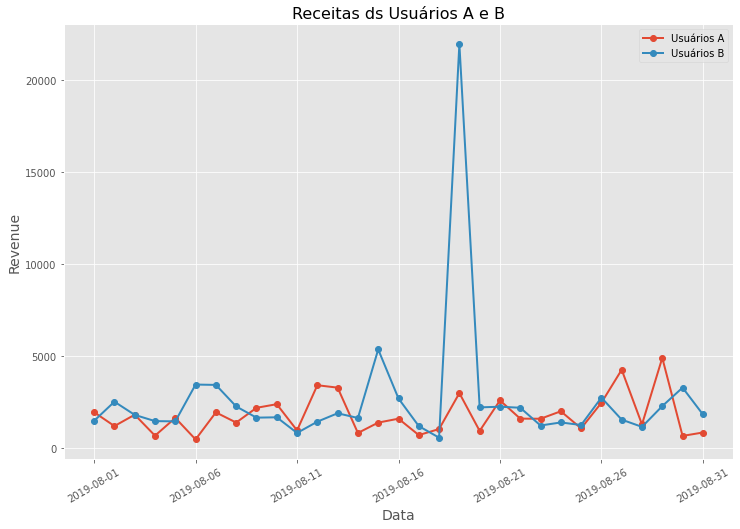

In [57]:
col1 = 'steelblue'
col2 = 'darkred'

ax = ordersA.plot(x='date',y='revenue',linewidth=2, label='Usuários A',marker='o', figsize=(12,8))
ordersB.plot(ax=ax,x='date',y='revenue',linewidth=2,marker='o',label='Usuários B')
ax.set_xlabel('Data',fontsize=14)
ax.set_ylabel('Revenue',fontsize=14)

ax.set_title("Receitas ds Usuários A e B",size=16)
ax.xaxis.set_tick_params(rotation = 30)
plt.legend()
plt.show()

Pelas tabelas e gráficos gerados acima, percebe-se uma diferença em favor do grupo B em relação a grupo A, principalmente quando analisado os gráficos de reeita e transações, percebe-se uma pequena vantagem do grupo B. Outro ponto interessante é a mediana da relação entre isitas e receita: o grupo A tem 2,4% enquanto o grupo B tem um valor de 3,1%. 

<div class="alert alert-block alert-danger">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Excelente a seção, aqui também só há o ponto que comentei, após verificar os usuários que estão em ambos grupos, pode ser que seus resultados mudem!
    
Após fazer isso, por favor, poderia adicionar também comentários parciais ao fim desta seção?
</div>

<div class="alert alert-block alert-info">
<b>Oi Lara. Adicionado. Obrigado pelas observações. </b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (revisão 2)</b> <a class="tocSkip"></a>
    
Boa! Imagina.Obrigada.
</div>

### Calculando os percentis da qantidade de pedidos

In [59]:
#Removendo algumas colunas e agrupando por visitorId e transactionId unicos
orders_users = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_users

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,8300375,1
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,1
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [130]:
#Renomenado as colunas
orders_users.columns = ['userId', 'orders']
orders_users.sort_values(by='orders', ascending=False).head(10)

,userId,orders
0,5114589,1
645,2666467773,1
679,2785527055,1
680,2801638130,1
681,2803209166,1
682,2805132315,1
683,2819072957,1
684,2819363575,1
685,2830871062,1
686,2837914161,1


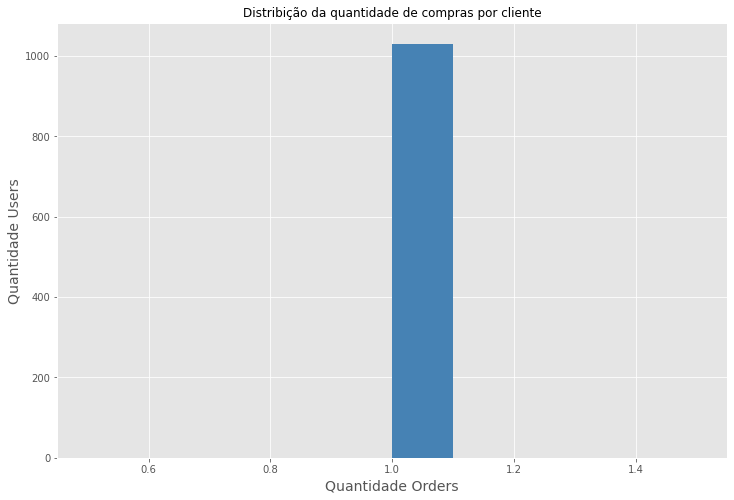

In [131]:
col1 = 'steelblue'
fig, ax = plt.subplots(figsize=(12,8))
orders_users.sort_values(by='orders', ascending=False).head(10)
plt.hist(orders_users['orders'],color=col1)
ax.set_xlabel('Quantidade Orders',fontsize=14)
ax.set_ylabel('Quantidade Users',fontsize=14)

ax.set_title("Distribição da quantidade de compras por cliente",size=12)
plt.show()

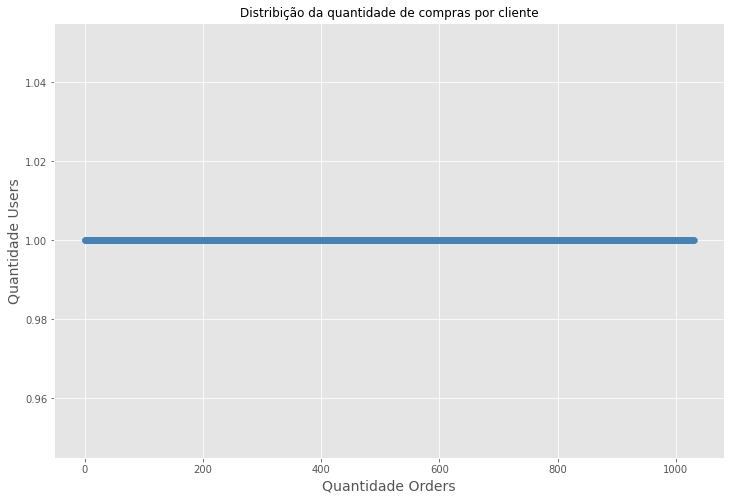

In [132]:
col1 = 'steelblue'
fig, ax = plt.subplots(figsize=(12,8))
x_values = pd.Series(range(0, len(orders_users)))
plt.scatter(x_values,orders_users['orders'],color=col1)
ax.set_xlabel('Quantidade Orders',fontsize=14)
ax.set_ylabel('Quantidade Users',fontsize=14)
ax.set_title("Distribição da quantidade de compras por cliente",size=12)
plt.show()

In [133]:
#Determinando os percentis 
np.percentile(orders_users['orders'],[95,99])

array([1., 1.])

Aplicando a função np.percentile e verificando a distribuição da quantidade de compras, percebe-se quetodos os usuários realizaram uma somente uma compra no período.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Excelente a seção, só há o ponto que comentei, aqui também após verificar os usuários que estão em ambos grupos, pode ser que seus resultados mudem!
</div>

In [ ]:
<div class="alert alert-block alert-info">
<b>Oi Lara. Ajstado o comentário. Obrigado pelas observações.</b> <a class="tocSkip"></a>
</div>

### Calculando os percentis dos preços dos produtos

In [64]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


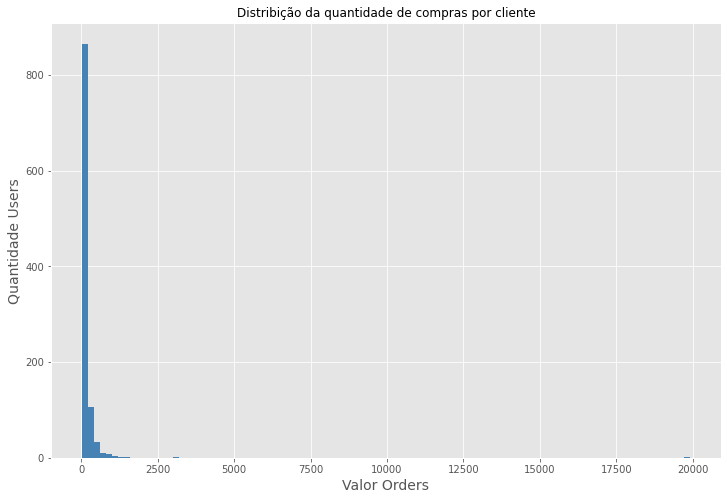

In [65]:
col1 = 'steelblue'
fig, ax = plt.subplots(figsize=(12,8))

plt.hist(orders['revenue'],bins=100,color=col1)
ax.set_xlabel('Valor Orders',fontsize=14)
ax.set_ylabel('Quantidade Users',fontsize=14)

ax.set_title("Distribição da quantidade de compras por cliente",size=12)
plt.show()

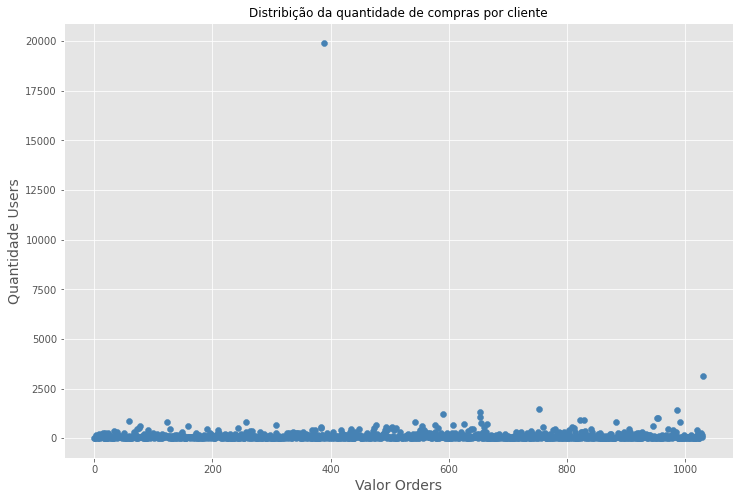

In [66]:
col1 = 'steelblue'
fig, ax = plt.subplots(figsize=(12,8))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'],color=col1) 
ax.set_xlabel('Valor Orders',fontsize=14)
ax.set_ylabel('Quantidade Users',fontsize=14)
ax.set_title("Distribição da quantidade de compras por cliente",size=12)
plt.show()

In [67]:
#Determinando os percentis 
np.percentile(orders['revenue'],[95,99])

array([435.6 , 896.71])

Aplicando a função np.percentile e verificando a distribuição dos valores das compras, percebe-se que cerca de 95% dos usuários realizaram compras de até 435.54 no período e cerca de 99% realizaram compras de até 900.00 no período. Isso fica evidenciado nos gráficos de  histograma e dispersão plotados acima, onde evindencia que praticamente boa parte das compras realizadas foram de até 500.00. Os dados acima desse valor serão tratados como outliers e, portanto, serão filtrados do conjunto de dados. 

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Excelente a seção, só há o ponto que comentei, após verificar os usuários que estão em ambos grupos, pode ser que seus resultados mudem!
</div>

In [ ]:
<div class="alert alert-block alert-info">
<b>Oi Lara. Ajstado o comentário. Obrigado pelas observações.</b> <a class="tocSkip"></a>
</div>

### Análise das  métricas cumulativas

Com o intuito de verificar o comportamento dos grupos ao longo do período de teste, é verificado a estabilidade das métricas analisando dados cumulativos

In [68]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [69]:
#Tipo de dados do campo 'date'
orders['date'] = pd.to_datetime(orders['date'], errors='coerce', format="%Y-%m-%d")
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1031 non-null   int64         
 1   visitorId      1031 non-null   int64         
 2   date           1031 non-null   datetime64[ns]
 3   revenue        1031 non-null   float64       
 4   group          1031 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 48.3+ KB


In [70]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [71]:
#Tipo de dados do campo 'date'
visits['date'] = pd.to_datetime(visits['date'], errors='coerce', format="%Y-%m-%d")
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [72]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <=x['date'],orders['group'] == x['group'])].agg({'date':'max','group':'max','transactionId' :pd.Series.nunique,'visitorId': pd.Series.nunique, 'revenue':'sum'}),axis=1).sort_values(by=['date','group'])

In [73]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,19,19,1950.0
66,2019-08-01,B,20,20,1484.7
175,2019-08-02,A,36,36,3148.1
173,2019-08-02,B,42,42,4007.5
291,2019-08-03,A,60,60,4963.3


In [74]:
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [75]:
visitorsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [76]:
# juntando as duas tabelas em uma e dando nomes descritivos para suas colunas
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [77]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,19,19,1950.0,719
1,2019-08-01,B,20,20,1484.7,713
2,2019-08-02,A,36,36,3148.1,1338
3,2019-08-02,B,42,42,4007.5,1294
4,2019-08-03,A,60,60,4963.3,1845


In [78]:
#Dataframe com pedidos cumulativos e reeita cumulatia por dia, grup B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]

In [79]:
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,1484.7,20
3,2019-08-02,4007.5,42
5,2019-08-03,5814.3,58
7,2019-08-04,7281.0,72
9,2019-08-05,8735.8,94


In [80]:
#Dataframe com pedidos mulativos e receta cmulativa por dia, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue','orders']]

In [81]:
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,1950.0,19
2,2019-08-02,3148.1,36
4,2019-08-03,4963.3,60
6,2019-08-04,5638.8,71
8,2019-08-05,7281.4,92


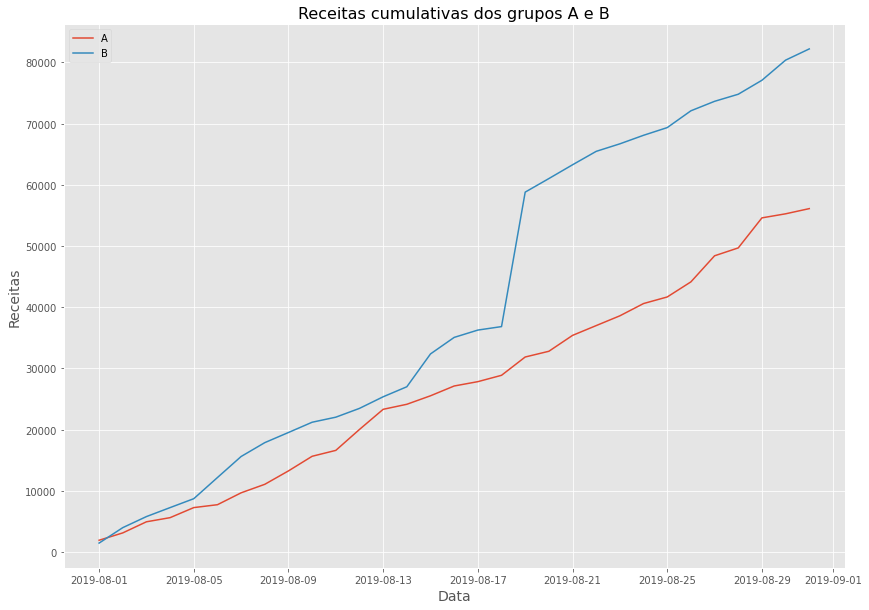

In [82]:
col1 = 'steelblue'
col2 = 'darkred'

fig, ax = plt.subplots(figsize=(14,10))
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue'], label='B')

ax.set_xlabel('Data',fontsize=14)
ax.set_ylabel('Receitas',fontsize=14)
ax.set_title("Receitas cumulativas dos grupos A e B",size=16)
plt.legend()
plt.show()

Verifica-se pelo gráfico que o grupo se manteve sempre à frente com relação às receitas se comparado ao grupo A. A partir da metade do período, houve um deslocamento grande entre linhas, possivelmente devido aos pedidos grandes. 

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Aqui também, após verificar os usuários que estão em ambos grupos, pode ser que seus resultados mudem!
</div>

In [ ]:
<div class="alert alert-block alert-info">
<b>Oi Lara. Ajstado o comentário. Obrigado pelas observações.</b> <a class="tocSkip"></a>
</div>

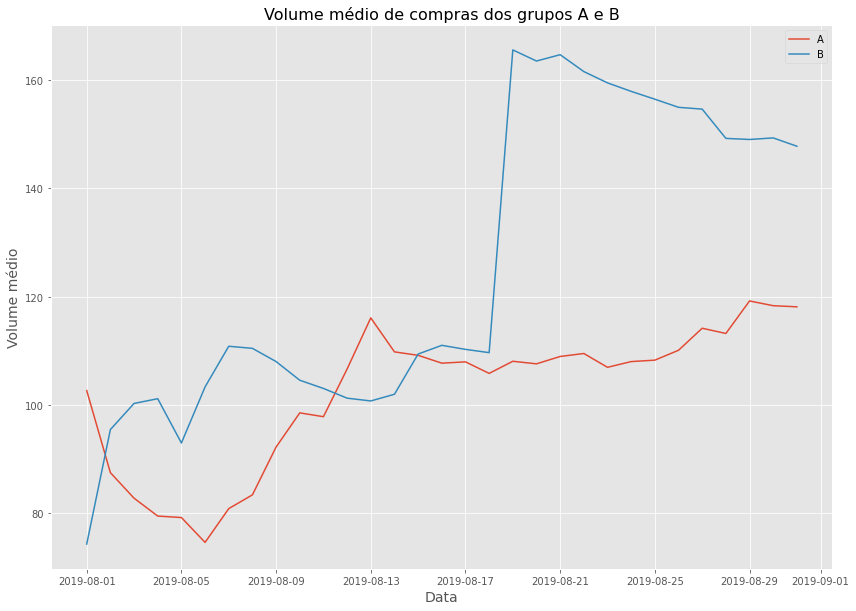

In [134]:
col1 = 'steelblue'
col2 = 'darkred'

fig, ax = plt.subplots(figsize=(14,10))

plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B') 
ax.set_xlabel('Data',fontsize=14)
ax.set_ylabel('Volume médio',fontsize=14)
ax.set_title("Volume médio de compras dos grupos A e B",size=16)
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso! novamente só há o ponto dos usuários em ambos grupos que pode mudar seus resultados.
</div>

In [ ]:
<div class="alert alert-block alert-info">
<b>Oi Lara. Ajstado o comentário. Obrigado pelas observações.</b> <a class="tocSkip"></a>
</div>

Pelo gráfico acima plotado, percebe-se que o valor cumulativo dos valores médios de compras dos grupos apresenta uma grande flutuação ainda possivelmente sendo devido ao fato dos outliers.

In [84]:
#JUntando as tabelas 'cumulativeRevenueA' e 'cumulativeRevenueB'
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',right_on='date', how='left', suffixes=['A','B'])

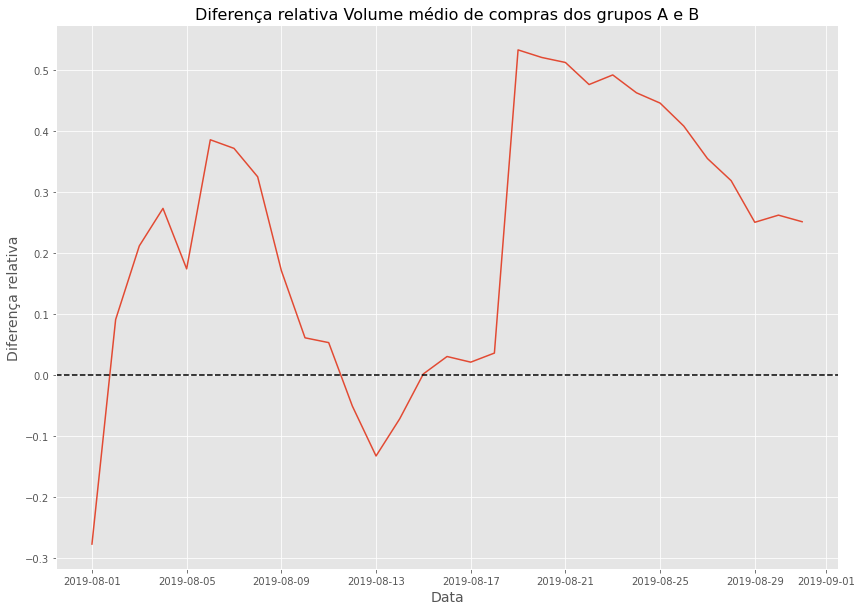

In [85]:
col2 = 'darkred'

fig, ax = plt.subplots(figsize=(14,10))

plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0,color='black', linestyle='--')
ax.set_xlabel('Data',fontsize=14)
ax.set_ylabel('Diferença relativa',fontsize=14)
ax.set_title("Diferença relativa Volume médio de compras dos grupos A e B",size=16)

plt.show()

Analinsando o gráfico plotado acima, nota-se a discrepância entre os volumes de dados dos grupos A e B. Há uma variação muito grande que se estende ao longo do período, com picos de quase 50% de diferença entre os grupos. 

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso! novamente só há o ponto dos usuários em ambos grupos que pode mudar seus resultados.
</div>

In [ ]:
<div class="alert alert-block alert-info">
<b>Oi Lara. Ajstado o comentário. Obrigado pelas observações.</b> <a class="tocSkip"></a>
</div>

In [86]:
#Calculando a taxa de conversão
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [87]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,19,19,1950.0,719,0.026426
1,2019-08-01,B,20,20,1484.7,713,0.028050
2,2019-08-02,A,36,36,3148.1,1338,0.026906
3,2019-08-02,B,42,42,4007.5,1294,0.032457
4,2019-08-03,A,60,60,4963.3,1845,0.032520


In [88]:
#Filtrando pelo grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

In [89]:
cumulativeDataA.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,19,19,1950.0,719,0.026426
2,2019-08-02,A,36,36,3148.1,1338,0.026906
4,2019-08-03,A,60,60,4963.3,1845,0.032520
6,2019-08-04,A,71,71,5638.8,2562,0.027713
8,2019-08-05,A,92,92,7281.4,3318,0.027728


In [90]:
#Filtrando pelo grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

In [91]:
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,20,20,1484.7,713,0.028050
3,2019-08-02,B,42,42,4007.5,1294,0.032457
5,2019-08-03,B,58,58,5814.3,1803,0.032169
7,2019-08-04,B,72,72,7281.0,2573,0.027983
9,2019-08-05,B,94,94,8735.8,3280,0.028659


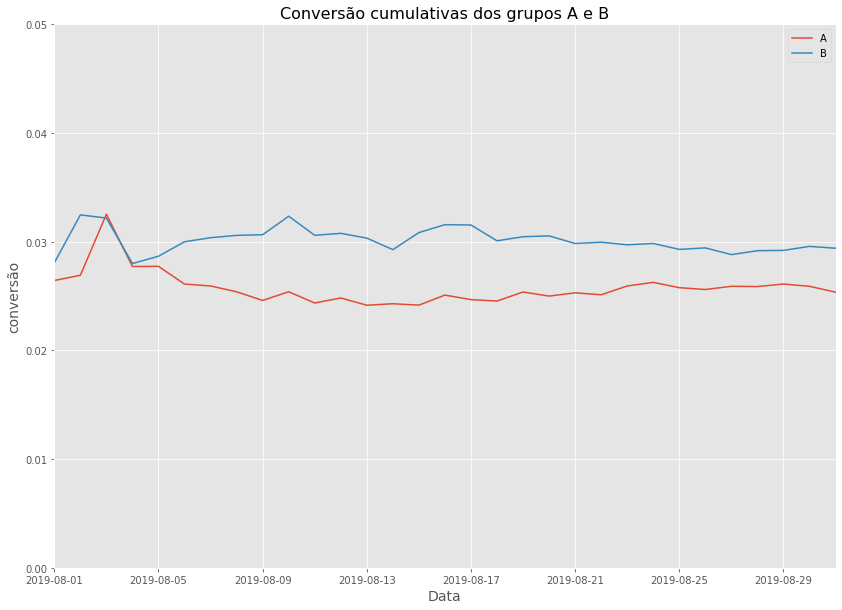

In [92]:
col1 = 'steelblue'
col2 = 'darkred'

fig, ax = plt.subplots(figsize=(14,10))
plt.plot(cumulativeDataA['date'],cumulativeDataA['conversion'],label='A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['conversion'],label='B')
plt.legend()

ax.set_xlabel('Data',fontsize=14)
ax.set_ylabel('conversão',fontsize=14)
ax.set_title("Conversão cumulativas dos grupos A e B",size=16)
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0, 0.05])
plt.show()

Pelo gráfico pltado acima, nota-se que o grupo B sempre se manteve a frente d grupo A, crescendo de forma gradual, com indícios de estabilidade no período. O grupo A também demonstra indícios de estabilidade, com declínio gradual no período.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso! novamente só há o ponto dos usuários em ambos grupos que pode mudar seus resultados.
</div>

In [ ]:
<div class="alert alert-block alert-info">
<b>Oi Lara. Ajstado o comentário. Obrigado pelas observações.</b> <a class="tocSkip"></a>
</div>

In [93]:
#JUntando as tabelas 'cumulativeDataA' e 'cumulativeDataB'
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],left_on='date',right_on='date',how='left',suffixes=['A','B'])

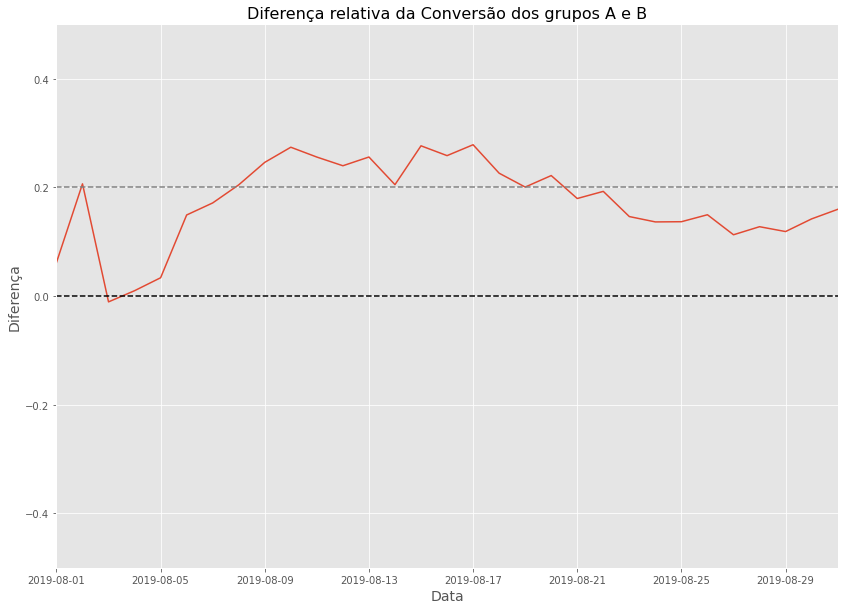

In [94]:
col1 = 'steelblue'
col2 = 'darkred'
fig, ax = plt.subplots(figsize=(14,10))

plt.plot(mergedCumulativeConversions['date'],mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0,color='black',linestyle='--')
plt.axhline(y=0.2,color='grey',linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.5, 0.5])
ax.set_xlabel('Data',fontsize=14)
ax.set_ylabel('Diferença',fontsize=14)
ax.set_title("Diferença relativa da Conversão dos grupos A e B",size=16)
plt.show()

Pelo gráfico acima da diferença relativa de conversão entre os grupos A e B, nota uma grande vantagem do grupo B em relação ao grupo A, praticamente desde o início do preíodo, chegando a ultrapassar os 20% por mais de 10 dias antes da metade do período. A partir disso, houve uma queda e nos últimos dias do período há indícios de que possa haver uma ascensão.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Sucesso! novamente só há o ponto dos usuários em ambos grupos que pode mudar seus resultados.
</div>

In [ ]:
<div class="alert alert-block alert-info">
<b>Oi Lara. Ajstado o comentário. Obrigado pelas observações.</b> <a class="tocSkip"></a>
</div>

### Significância Estatística com dados brutos

A significância estatística mede a probabilidade de uma discrepância observada entre duas amostras ter origem no acaso. Como o porpósito do estudo é a análise de um teste A/B mediante a escolha de uma das hipóteses que mais se adequa ao objetivo proposto a qual: "De uma lista de hipóteses, priorizar as que podem aumentar a receita, lançando um Teste A/B e analisando os resultados." Sendo assim, a hipótese pretendida na análise será: "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size" (Adicione blocos de recomendação de produtos ao site da loja. Isso aumentará a conversão e o tamanho médio da compra). Essa hipótese foi escolhida em função dos resultados dos frameworks ICE e RICE e pelo equilíbrio entre os parâmetros.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Excelente, foram adicionados comentários iniciais.</div>

#### Diferença na conversão entre A e B

In [95]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [96]:
#Agrupando a pelo grupo A por 'transactionId' únicos
orders_users_a = orders.query("group == 'A'").groupby('visitorId').agg({'transactionId':'nunique'}).reset_index()
orders_users_a.rename(columns = {'visitorId':'visitorId','transactionId':'orders'}, inplace=True)

In [97]:
orders_users_a.head()

,visitorId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [98]:
#Agrupando a pelo grupo B por 'transactionId' únicos
orders_users_b = orders.query("group == 'B'").groupby('visitorId').agg({'transactionId':'nunique'}).reset_index()
orders_users_b.rename(columns = {'visitorId':'visitorId','transactionId':'orders'}, inplace=True)

In [99]:
orders_users_b.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Para aplicação dos testes, é necessário um preparo das bases de dados. Para isso, será criado uma matriz unidimensional do tipo Series, onde cada elemento será a quantidade de pedidos feita por um usuário específico (caso o cliente não tenha feito nenhum pedido, será atribuído a ele o valor 0). Sendo assim, a quantidade de elementos é a quantidade de usuários e a soma dos elementos será a soma de todos os pedidos. Esse procedimento será feito para cada grupo (A e B) separadamente.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Excelente, foram adicionados comentários sobre o que foi feito.</div>

In [100]:
sample_conversion_a = pd.concat([orders_users_a['orders'],pd.Series(0,index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(orders_users_a['orders'])),name='orders')], axis=0)

In [101]:
sample_conversion_a.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [102]:
sample_conversion_b = pd.concat([orders_users_b['orders'],pd.Series(0,index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(orders_users_b['orders'])),name='orders')], axis=0)

In [103]:
sample_conversion_b.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [104]:
alpha = 0.05 # nível de significância

result_conversion = (st.mannwhitneyu(sample_conversion_a, sample_conversion_b)[1]).round(4)
print("p-value: ", result_conversion)

if (result_conversion < alpha):
    print("Hipótese nula rejeitada. A diferença possui significância estatística.")
else:
    print("Falha em rejeitar a hipótese nula. Não é possível chegar a uma conclusão sobre a diferença.")

p-value:  0.0163
Hipótese nula rejeitada. A diferença possui significância estatística.


In [105]:
(sample_conversion_b.mean()/sample_conversion_a.mean()-1).round(4)

0.1594

Conforme dados obtidos acima, temos que:

                - alpha = 0.05

                - H0 = Há diferenças significativa na taxa de conversão entre as amostras
                - H1 = Não há diferenças significativas na taxa de conversão entre as amostras


onde foi obtido um um p-value de 0.0163 (< que 0.05) demonstrando que há indícios de que as amostras dos grupos A e B possuam as taxas de conversão com diferenças estatísticamente significativas entre elas.
Extraindo a média dos grupos A e B (samplea e sampleb) e calculando a diferença relativa entre ambos, temos que o grupo B tem uma conversão 15,8% melhor do que o grupo A.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Excelente! Novamente aqui precisamos revisar se não houveram alterações pós correção. </div>

In [ ]:
<div class="alert alert-block alert-info">
<b>Oi Lara. Ajstado o comentário. Obrigado pelas observações.</b> <a class="tocSkip"></a>
</div>

#### Diferença no tamanho médio dos pedidos entre A e B

In [106]:
#Filtrando pelo grupo A
sample_revenue_a = orders[orders['group']=='A']['revenue']

In [107]:
sample_revenue_a.head()

2      10.2
7      20.1
8     215.9
10     65.7
12    115.4
Name: revenue, dtype: float64

In [108]:
#Filtrando pelo grupo B
sample_revenue_b = orders[orders['group']=='B']['revenue']

In [109]:
sample_revenue_b.head()

0     30.4
1     15.2
3    155.1
4     40.5
5     35.0
Name: revenue, dtype: float64

In [110]:
alpha = 0.05

result_orders =  (st.mannwhitneyu(sample_revenue_a, sample_revenue_b)[1]).round(4)
print("p-value: ", result_orders)

if (result_orders < alpha):
    print("Hipótese nula rejeitada. A diferença possui significância estatística.")
else:
    print("Falha em rejeitar a hipótese nula. Não é possível chegar a uma conclusão sobre a diferença.")

p-value:  0.9232
Falha em rejeitar a hipótese nula. Não é possível chegar a uma conclusão sobre a diferença.


In [111]:
((orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)).round(4)

0.2514

Conforme dados obtidos acima, temos que:

                - alpha = 0.05

                - H0 = Há diferenças significativa no volume médio dos pedidos entre as amostras
                - H1 = Não há diferenças significativas no volume médio dos pedidos entre as amostras


onde foi obtido um um p-value de 0.9232 (> que 0.05) demonstrando que não há indícios de que as amostras dos grupos A e B possuam volumes de receitas com diferenças estatísticamente significativas entre elas.
Extraindo a receita média dos grupos A e B (samplea e sampleb) e calculando a diferença relativa entre ambos, temos que o grupo B tem um volume médio de pedidos 25,1% melhor do que o grupo A.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Excelente! Novamente aqui precisamos revisar se não houveram alterações pós correção. </div>

In [ ]:
<div class="alert alert-block alert-info">
<b>Oi Lara. Ajstado o comentário. Obrigado pelas observações.</b> <a class="tocSkip"></a>
</div>

### Significância Estatística com dados filtrados

Na aplicação do filtro serão adotados os valores calculados no item 4, que são: usuários que realizaram até 4 compras e receita de até 500.00

In [112]:
#Filtrando os grupos A e B com compras acima de 4
users_many_quant = pd.concat([orders_users_a[orders_users_a['orders'] > 4]['visitorId'],orders_users_b[orders_users_b['orders'] > 4]['visitorId'],],axis=0,)

In [113]:
print(users_many_quant)
users_many_quant.shape[0]

Series([], Name: visitorId, dtype: int64)


0

In [114]:
#Filtrando pela receita > 500
users_exp_orders = orders[orders['revenue'] > 500]['visitorId']

In [115]:
print(users_exp_orders.head())
users_exp_orders.shape[0]

60     4256040402
77      787824685
78     3288820196
131    2254586615
173    2953427180
Name: visitorId, dtype: int64


40

In [116]:
#Filtand o conjunto de dados 'orders'
orders_filtered = orders[orders['revenue'] < 500]
orders_filtered.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


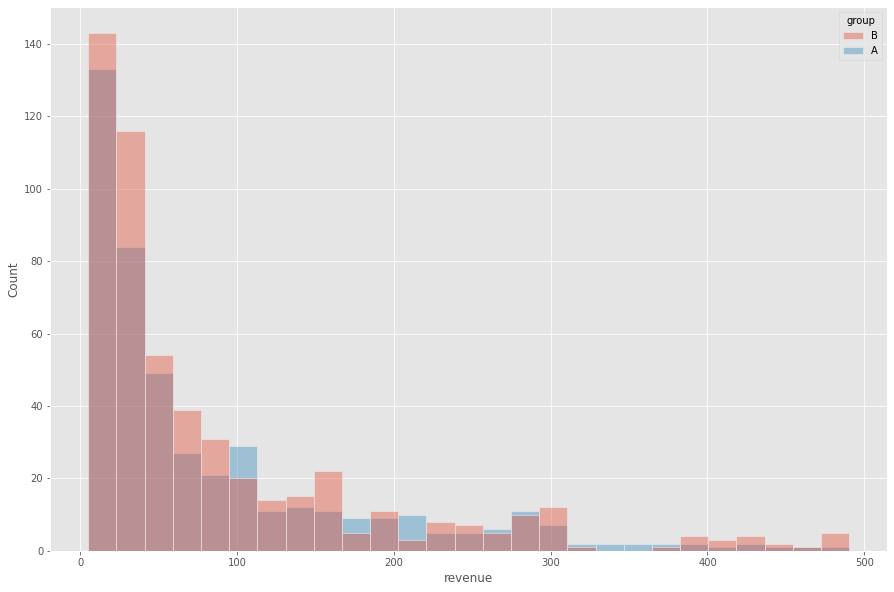

In [117]:
plt.figure(figsize=(15,10))
sns.histplot(data=orders_filtered, x="revenue", hue="group", alpha=0.4)
plt.show()

Com o gráfico plotado acima da distribuição das compras abaixo de 500.00, percebe-se uma leve vantagem do grupo B sobre o grupo A e como está a distribuição das compras ao longo do mês. Comparando o gráfico acima com o gráfico plotado no tópico 3 antes do filtro, é possivel notar a infuência dos outliers na análise das métricas.

In [118]:
#Juntando as tabelas e eliminando duplicados
users_total_many = pd.concat([users_many_quant, users_exp_orders], axis = 0).drop_duplicates().sort_values()

In [119]:
print(users_total_many.head())
users_total_many.shape[0]

1099    148427295
928     204675465
684     358944393
648     382846391
751     689129267
Name: visitorId, dtype: int64


40

Pelas tabelas geradas resultantes dos filtros propostos, os 5 usuários que compraram mais que 4 vezes no período são usuários que também constam no grupo filtrado dos que gastaram mais que 500.00.

In [120]:
sample_conv_filt_a = pd.concat([orders_users_a[np.logical_not(orders_users_a['visitorId'].isin(users_total_many))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_users_a['orders'])),name='orders')],axis=0)

In [121]:
sample_conv_filt_a.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [122]:
sample_conv_filt_b = pd.concat([orders_users_b[np.logical_not(orders_users_b['visitorId'].isin(users_total_many))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_users_b['orders'])),name='orders')],axis=0)

In [123]:
sample_conv_filt_b.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [124]:
alpha = 0.05 # nível de significância

result_conversion_filter = (st.mannwhitneyu(sample_conv_filt_a, sample_conv_filt_b)[1]).round(4)
print("p-value: ", result_conversion_filter)

if (result_conversion_filter < alpha):
    print("Hipótese nula rejeitada. A diferença possui significância estatística.")
else:
    print("Falha em rejeitar a hipótese nula. Não é possível chegar a uma conclusão sobre a diferença.")

p-value:  0.0141
Hipótese nula rejeitada. A diferença possui significância estatística.


In [125]:
#Taxa de conversão entre A e B
((sample_conv_filt_b.mean()/sample_conv_filt_a.mean()-1)).round(4)

0.1668

Comparando os valores da significância estatística dos dados sem filtro ('result_conversion') e dos dados filtrados acima ('result_conversion_filter') percebe-se uma diferença numericamente pequena entre os valores, porém de cerca de 10% em termos percentuais. Isso se deve ao fato de que a quantidade de valores outliers serem em pequena quantidade (5 valores). Portanto sendo uma diferença de pouca quantidade, não alterou o resultado relativo à conversão.

In [126]:
sample_rev_filt_a = orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(users_total_many)))]['revenue']

In [127]:
sample_rev_filt_b = orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(users_total_many)))]['revenue']

In [128]:
alpha = 0.05

result_orders_filter =  (st.mannwhitneyu(sample_rev_filt_a, sample_rev_filt_b)[1]).round(4)
print("p-value: ", result_orders_filter)

if (result_orders_filter < alpha):
    print("Hipótese nula rejeitada. A diferença possui significância estatística.")
else:
    print("Falha em rejeitar a hipótese nula. Não é possível chegar a uma conclusão sobre a diferença.")

p-value:  0.9301
Falha em rejeitar a hipótese nula. Não é possível chegar a uma conclusão sobre a diferença.


In [129]:
#Taxa de receita entre A e B
((sample_rev_filt_b.mean() / sample_rev_filt_a.mean()) - 1).round(4)

0.0121

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Excelente! Novamente aqui precisamos revisar se não houveram alterações pós correção, mas seu trabalho está correto. </div>

## Conclusões

O objetivo da análise é, dada uma lista de hipóteses, priorizar aquelas que podem aumentar a receita e, a partir disso, anlisar os resultados de um teste A/B.
Particularmente na área de marketing, um teste A/B é utilizado para otimizar as estratégias de marketing na web, permitindo que sejam tomadas decisões observando resultados analíticos do teste realizado. A partir de uma hipótese escolhida, verificam-se os resultados de H0 e H1 para os casos de conversão e receita.

No capitulo 1 foi carregado as bases de dados e bibliotecas que seriam utilizadas na análise.

No capítulo 2 foi verificado nos conjuntos de dados:
  - os valores ausentes e duplicados
  - correção do tipo de dado (principalmente datetime das bases de dados)

NO capítulo 3 foi relizada a priorização das hipóteses formuladas onde verificou- se que  os frameworks ICE e RICE se diferem especialmente na influência da medição REACH (Alcance), ou seja, quando os valores para essa medida são baixos, ICE e RICE são indiferentes. Proém quando  mediçã REACH atinge um determinado valor, acaba influenciando no resultado.
O framework ICE é utilizado quando não há a necessidade de diferenciar entre alcance e impacto. Já o framework RICE quando quiser diferenciar entre um recurso que pode ter um grande impacto para um público pequeno e um pequeno impacto para um grande público. Como o objetivo do teste é um aumento da receita e pelos números apresentados, foi escolhido o teste 2 - "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size" (Adicione blocos de recomendação de produtos ao site da loja. Isso aumentará a conversão e o tamanho médio da compra).

No capítulo 4 deu-se início aos preparativos para o teste A/B. Foram gerados os gráfico do conjunto de dados 'orders', onde verifica-se o comportamento dos grupos A e B ao analisar as receitas. Percebe-se a distorção dos outliers ao plotar um gráfico com a media e mediana de ambos os grupos, ou seja, o grupo B mais usuários realiaram compras com valores altos se comparadoao grupo A. Isso fica evidenciado quando plotado o histograma dos dados, onde verifica-se a grande variabilidade dos valores dos dados. Também foi plotado um gráfico de barras da receita diária dos dois grupos, onde fica evidente os valores outliers. Nota-se também uma pequena vantagem do grupo B em relação ao grupo A em termos de receita. Foi plotado também um gráfico com a receita total dos dois grupos no período, onde também verifica-se a sazonalidade e variabilidade das receitas ao longo do período.

Ao verificar o gráfico das transações diárias separadas por grupo, é possivel notar o que já foi exposto: há uma leve vantagem do grupo B(azul) em relação ao grupo A também em quantidade de transações realizadas, com uma média de 20.6 (grupo B) frente a 17.9 (grupo A). Já a relação acessos/receita ao calcular a média/mediana dos grupos no período, também nota-se uma vantagem do grupo B(3.5%) contra o grupo A(2.7%).

Para o cálculo dos percentis na quantidade de pedidos, ao criar as tabelas e cálculos apropridos e aplicando a função np.percentile e verificando a distribuição da quantidade de compras, percebe-se que cercatodos os usuários realizaram somente 1 compra no período.

O mesmo procedimento foi feito para a receita, percebe-se que cerca de 95% dos usuários realizaram compras de até 435.54 no período e cerca de 99% realizaram compras de até 900.00 no período. Isso fica evidenciado nos gráficos de  histograma e dispersão plotados acima, onde evindencia que praticamente boa parte das compras realizadas foram de até 500.00. Os dados acima desse valor serão tratados como outliers e, portanto, serão filtrados do conjunto de dados.

Foi verificado também as métricas cumulativas dos grupos A e B, com o objetivo de verificar a estabilidade das métricas, onde as tabelas e os gráficos plotados indicam grande antagem do grupo B em relação ao grupo A, tanto relação ao volume de compras (mesmo mostrando uma queda no final do período) quanto em relação a conversão (onde chego a atingir 20% de diferença, demonstrando ao final do período uma tendência a ascensão).

No item 4.7 inicia-se a análise da significância estatística, onde foi calculado a diferença na conversão entre os grupos A e B. Após a manupulação das tabelas, tem-se:

            - alpha = 0.05

            - H0 = Não há diferenças significativa na taxa de conversão entre as amostras
            - H1 = Há diferenças significativas na taxa de conversão entre as amostras
            
onde foi obtido um um p-value de 0.0168 (< que 0.05) demonstrando que há indícios de que as amostras dos grupos A e B possuam as taxas de conversão com diferenças estatísticamente significativas entre elas. Extraindo a média dos grupos A e B (samplea e sampleb) e calculando a diferença relativa entre ambos, temos que o grupo B tem uma conversão 15,8% melhor do que o grupo A.

Já para o cálculo do volume médio, tem-se:

             - alpha = 0.05

             - H0 = Não há diferenças significativa no volume médio dos pedidos entre as amostras
             - H1 = Há diferenças significativas no volume médio dos pedidos entre as amostras


onde foi obtido um um p-value de 0.9232 (> que 0.05) demonstrando que não há indícios de que as amostras dos grupos A e B possuam volumes de receitas com diferenças estatísticamente significativas entre elas.
Extraindo a receita média dos grupos A e B (samplea e sampleb) e calculando a diferença relativa entre ambos, temos que o grupo B tem um volume médio de pedidos 25,1% melhor do que o grupo A.

Como verificou-se uma grande quantidade de outliers no conjunto de dados, houve a necessidade de aplicar um filtro e refazer a análise já com  os dados filtrados. Os filtros aplicados foram: até 4 compras (5 exclusões) e valor de até 500 (46 exclusões).

Foi obtido um p-value de 0.0141 .Comparando os valores da significância estatística dos dados sem filtro ('result_conversion') e dos dados filtrados acima ('result_conversion_filter') percebe-se uma diferença numericamente pequena entre os valores, porém de cerca de 10% em termos percentuais.

Já para o volume de receitas dos dados filtrados, o valor foi de 0.809 um aumento de 17% em relação aos dados sem filtro. já a diferença relativa entre o volume médio de pedidos foi de 0.0155 (queda de mais de 90%).

Pelo exposto, percebe-se que:

 - com relação à conversão, há indícios estatísticos significativos para afimar que  houve uma  melhora noa valores antes e após os filtros aplicados;
 - com relação ao volume de receita, nao há indícios estatísticos para afimar que ue houve diferença significativa entre os grupos. Mesmo havendo um aumento de p-value, houve uma queda de 90% na diferença relativa.
 - os gráficos plotados dos valores acumulados da diferença relativa de conversão demonstram uma grande vantagem do grupo B
 - já com relação à diferença relativa do volume médio de compras, mesmo o grupo B apresentando uma crescente a partir da metade do período, há uma queda acentuada que permanece até o final do período.
 
Baseado nas observações acima, pode-se concluir que não houve melhora na receita, mesmo o grupo B apresentando uma taxa de conversão melhor que o grupo A. Como houveram muitos outliers no grupo B, uma possibilidade seria estender o teste afim de verificar se a taxa de conversão se mantém e se há uma melhora na receita.

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Excelente! Conclusões muito bem elaboradas. </div>

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (Revisão 1)</b> <a class="tocSkip"></a>
    
Alan, parabéns por seu trabalho!!

O único ponto crítico é o sobre o qual adicionei um comentário para verificar, que é o sobre remover usuários de ambos grupos, para não interferir nos resultados do teste de hipóteses.


Aguardo seus ajustes,

Lara.
</div>

<div class="alert alert-block alert-success">
<b>Comentário da Revisora (revisão 2)</b> <a class="tocSkip"></a>
    
Alan, parabéns novamente pelo seu trabalho e obrigada pelo ajuste!

Obrigada por ter revisto os resultados e comentários após ter feito o ajuste.

Desejo sucesso,

Lara.
</div>